# Assignment - Logistic regression


## Classification problem

This assignment will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) named `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

*Output Information:*

- class: edible = e, poisonous = p  

<br>

## <font color='red'>Practice</font>

Import numpy, matplotlib, pandas libraries

In [105]:
# write your code here
# ====================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
# read mushroom data
df = pd.read_csv('Kritsana NETPUGDEE - mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [107]:
# show column features
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [108]:
# show dimension of data
df.shape

(8124, 23)

### Visualization

1. To visualize the number of mushrooms for each cap color categorize. We will build a bar chart.

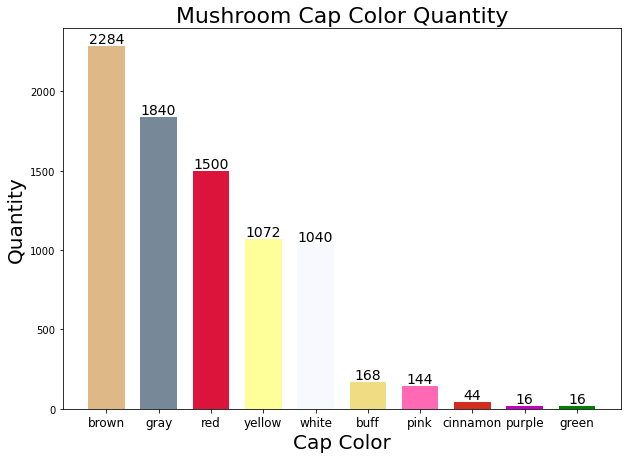

In [109]:
#Obtain total number of mushrooms for each 'cap-color' (Entire DataFrame)
cap_colors = df['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Provides numerical values
cap_colors.axes #Provides row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#=====PLOT Preparations and Plotting====#
ind = np.arange(10)  # the x locations for the groups
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']

fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Auto-labels the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display bars. 

2. The next bar chart shows the number of mushrooms based on "odor"

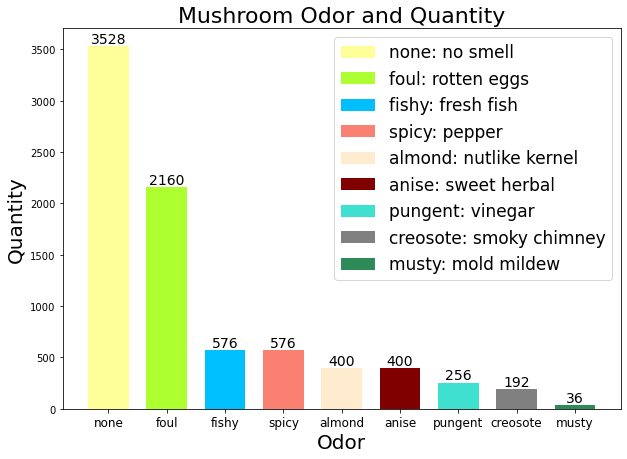

In [110]:
#Obtain total number of mushrooms for each 'odor' (Entire DataFrame)
odors = df['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#=====PLOT Preparations and Plotting====#
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Add some text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Odor and Quantity',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)

autolabel(odor_bars)        
plt.show() #Display bars. 

3. Pie Chart: Show the type of mushroom population.

[4040, 1712, 1248, 400, 384, 340]


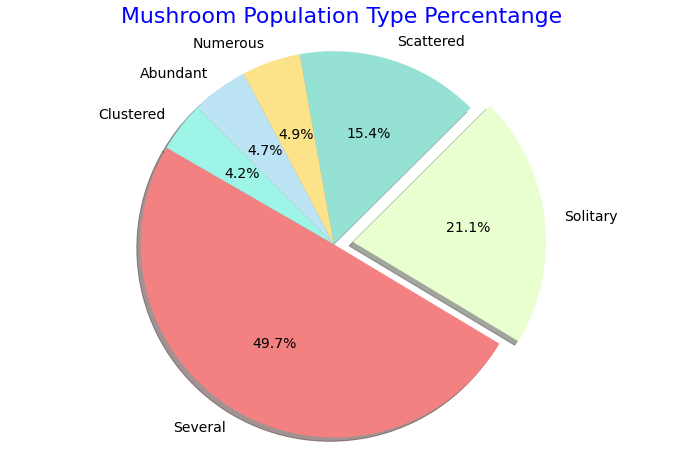

In [111]:
#Get the population types and its values for Single Pie chart
populations = df['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list
print(pop_size)

# Data to plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#F38181','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0.1, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))

# Plot
plt.title('Mushroom Population Type Percentange', fontsize=22, color = 'blue')
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show()

The data in the mushrooms dataset is currently encoded with strings. <font color='red'>***These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables.***</font> 

where class_p = 1 means a mushroom is poisonous and 0 is not poisonous.

In [112]:
mush_df = pd.get_dummies(df)
mush_df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [113]:
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 119 entries, class_e to habitat_w
dtypes: uint8(119)
memory usage: 944.2 KB


In [114]:
mush_df.describe()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
# Check for missing values
mush_df.isnull().sum()

class_e        0
class_p        0
cap-shape_b    0
cap-shape_c    0
cap-shape_f    0
              ..
habitat_l      0
habitat_m      0
habitat_p      0
habitat_u      0
habitat_w      0
Length: 119, dtype: int64

In [116]:
X_mush = mush_df.iloc[:,2:6]
X_mush

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8119,0,0,0,1
8120,0,0,0,0
8121,0,0,1,0
8122,0,0,0,1


In [117]:
# Choose input features from column 2 to 5 and target output
X_mush = mush_df.iloc[:,2:6]
y_mush = mush_df.iloc[:,1]

# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons in Questions 2 and 3, we will create a smaller version of the
# entire mushroom dataset for use in those questions.  For simplicity we'll just re-use
# the 25% test split (default) created above as the representative subset.

In [118]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6093, 4) (6093,)
Test set: (2031, 4) (2031,)


In [119]:
# Importing model from sci-kit learn and fitting model with training data
from sklearn.linear_model import LogisticRegression

## <font color='red'>Practice</font>

Create a logistic regression model by using '**liblinear**' as an optimization algorithm and then train your model.

In [120]:
# write your code here
# ====================
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=1.0, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(solver='liblinear')

In [121]:
# write your code to make your model prediction on testing data
# =============================================================
# Predicitions on testing data
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [122]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53, 0.47],
       [0.51, 0.49],
       [0.53, 0.47],
       ...,
       [0.53, 0.47],
       [0.53, 0.47],
       [0.28, 0.72]])

In [123]:
# Model performance evaluation
from sklearn.metrics import confusion_matrix

# write your code to show the confusion matrix
# ============================================
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
cnf_matrix

array([[1008,   53],
       [ 814,  156]], dtype=int64)

In [124]:
# write your code to show precision/recall, f1-score, and accuracy of the model
# =============================================================================
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1061
           1       0.75      0.16      0.26       970

    accuracy                           0.57      2031
   macro avg       0.65      0.56      0.48      2031
weighted avg       0.65      0.57      0.49      2031



### <font color='red'> Build your new logistic regression model</font>

You can see that using only 4 features (cap-shape_b, cap-shape_c, cap-shape_f, cap-shape_f) got poor performance in classification.

Please design a new logistic regression model in order to gain better performance and also show the classification result of your model.

Hint: You may try to add more feature.

In [126]:
# write your code
# ===============
from sklearn.metrics import log_loss


LR_new = LogisticRegression(C=100.0, solver='liblinear').fit(X_train,y_train)
print(LR_new)

yhat_new = LR_new.predict(X_test)
yhat_prob_new = LR_new.predict_proba(X_test)

print(yhat_new)
cnf_matrix_new = confusion_matrix(y_test, yhat_new, labels=[0,1])
print(cnf_matrix_new)
print (classification_report(y_test, yhat_new))
print ("LogLoss_1: : %.5f" % log_loss(y_test, yhat_prob))
print ("LogLoss_2: : %.5f" % log_loss(y_test, yhat_prob_new))




LogisticRegression(C=100.0, solver='liblinear')
[0 0 0 ... 0 0 1]
[[1008   53]
 [ 814  156]]
              precision    recall  f1-score   support

           0       0.55      0.95      0.70      1061
           1       0.75      0.16      0.26       970

    accuracy                           0.57      2031
   macro avg       0.65      0.56      0.48      2031
weighted avg       0.65      0.57      0.49      2031

LogLoss_1: : 0.65542
LogLoss_2: : 0.65516


### <font color='magenta'>Great job. You make it!!!</font>